In [42]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

census = pd.read_csv("/Users/andalouse/data/census_starter.csv")

census.isnull().sum()
census.describe() #48301=Loving County,Texas is 0 for a bunch of columns ( college foreign born...)

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2017,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021
count,3142.000000,3142.000000,3142.000000,3141.000000,3141.000000,3142.000000,3142.000000,3142.000000,3142.000000,3141.000000,...,3142.000000,3141.000000,3142.000000,3141.000000,3141.000000,3142.000000,3141.000000,3142.000000,3140.000000,3140.000000
mean,69.920401,72.690866,75.398600,78.543298,80.539096,30383.649268,13.813399,14.005379,14.240452,14.631328,...,1.427148,1.382171,1.338956,1.309265,1.272684,49754.163908,51583.175422,53475.909612,55012.443312,58223.339490
std,9.702052,9.255863,8.846665,8.250864,7.889931,15162.508374,5.586649,5.630199,5.689780,5.776940,...,0.986985,0.942777,0.940891,0.990342,0.968579,13154.424871,13703.502202,14192.529173,14649.568591,15541.038914
min,24.500000,25.700000,34.800000,33.300000,37.000000,1001.000000,2.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,19264.000000,20188.000000,21504.000000,22292.000000,17109.000000
25%,64.200000,67.425000,70.500000,74.100000,76.400000,18177.500000,9.700000,9.900000,10.100000,10.500000,...,0.800000,0.800000,0.700000,0.700000,0.600000,41123.000000,42480.000000,44155.000000,45653.000000,48179.500000
50%,70.700000,73.600000,76.450000,79.600000,81.700000,29176.000000,12.800000,13.000000,13.250000,13.600000,...,1.300000,1.300000,1.200000,1.200000,1.100000,48065.500000,49888.000000,51757.500000,52842.000000,55907.000000
75%,76.400000,78.800000,81.400000,84.100000,85.900000,45080.500000,16.800000,17.100000,17.300000,17.900000,...,1.900000,1.800000,1.800000,1.800000,1.700000,55763.500000,57611.000000,59867.250000,61500.750000,64930.000000
max,94.600000,95.500000,96.000000,97.100000,97.600000,56045.000000,43.700000,48.000000,45.400000,43.000000,...,17.400000,11.700000,10.500000,15.200000,15.200000,129588.000000,136268.000000,142299.000000,147111.000000,156821.000000


In [43]:
train = pd.read_csv("/Users/andalouse/data/train.csv")

state_map = train[['cfips', 'state']].drop_duplicates(subset='cfips') #on merge par cfips pour ajouter l'état
census = census.merge(state_map, on='cfips', how='left')


In [44]:
import pandas as pd
import numpy as np

groups = {
    "broadband": [f"pct_bb_{y}" for y in range(2017, 2022)],
    "college": [f"pct_college_{y}" for y in range(2017, 2022)],
    "foreign_born": [f"pct_foreign_born_{y}" for y in range(2017, 2022)],
    "it_workers": [f"pct_it_workers_{y}" for y in range(2017, 2022)],
    "income": [f"median_hh_inc_{y}" for y in range(2017, 2022)]
}

summary = []

for name, cols in groups.items():
    df_subset = census[cols]

    df_subset = df_subset.replace(0.0, np.nan)
    
    any_missing = df_subset.isna().any(axis=1).sum()
    all_missing = df_subset.isna().all(axis=1).sum()
    
    summary.append({
        "Variable Group": name,
        "Any Missing/Zero": any_missing,
        "All Missing/Zero": all_missing,
        "% Any Missing": round(any_missing / len(census) * 100, 2),
        "% All Missing": round(all_missing / len(census) * 100, 2)
    })

summary_df = pd.DataFrame(summary)
summary_df

#on remplace les 0 par NA 
census = census.replace(0.0, np.nan)

# on remplace les NA par la moyenne de l'état pour chaque variable
for name, cols in groups.items():
    for col in cols:
        year = col.split('_')[-1]
        census[col] = census.groupby('state')[col].transform(
            lambda x: x.fillna(x.mean())
        )
census 

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,state
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.1,0.700,0.600000,1.10,55317.0,58786.0,58731.0,57982.0,62660.0,Alabama
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.3,1.400,1.000000,1.30,52562.0,55962.0,58320.0,61756.0,64346.0,Alabama
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.3,0.800,1.100000,0.80,33368.0,34186.0,32525.0,34990.0,36422.0,Alabama
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.4,1.600,1.700000,2.10,43404.0,45340.0,47542.0,51721.0,54277.0,Alabama
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.4,0.900,1.100000,0.90,47412.0,48695.0,49358.0,48922.0,52830.0,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,82.2,82.4,84.0,86.7,88.4,56037,15.3,15.2,14.8,13.7,...,0.6,1.000,0.900000,1.00,71083.0,73008.0,74843.0,73384.0,76668.0,Wyoming
3138,83.5,85.9,87.1,89.1,90.5,56039,37.7,37.8,38.9,37.2,...,1.2,1.400,1.500000,2.00,80049.0,83831.0,84678.0,87053.0,94498.0,Wyoming
3139,83.8,88.2,89.5,91.4,90.6,56041,11.9,10.5,11.1,12.6,...,1.2,1.400,1.700000,0.90,54672.0,58235.0,63403.0,72458.0,75106.0,Wyoming
3140,76.4,78.3,78.2,82.8,85.4,56043,15.4,15.0,15.4,15.0,...,1.0,0.900,0.900000,1.10,51362.0,53426.0,54158.0,57306.0,62271.0,Wyoming


In [45]:
train["year"] = train["first_day_of_month"].dt.year

lag_map = {2019: 2017, 2020: 2018, 2021: 2019, 2022: 2020}
train["census_year"] = train["year"].map(lag_map)

census_long = census.melt(id_vars=["cfips", "state"], 
    var_name="variable", 
    value_name="value")

census_long["year"] = census_long["variable"].str.extract(r"(\d{4})").astype(int)
census_long["feature"] = census_long["variable"].str.replace(r"_\d{4}", "", regex=True)
census_long = census_long.drop(columns=["variable"])

census_long = census_long.pivot_table(index=["cfips", "state", "year"], 
    columns="feature", 
    values="value").reset_index()

train = train.merge(census_long, 
                    left_on=["cfips", "census_year"], 
                    right_on=["cfips", "year"], 
                    how="left")

train = train.drop(columns=["year_y"]).rename(columns={"year_x": "year"})


AttributeError: Can only use .dt accessor with datetimelike values

,pct_bb_2017,pct_bb_2018,pct_bb_2019,pct_bb_2020,pct_bb_2021,cfips,pct_college_2017,pct_college_2018,pct_college_2019,pct_college_2020,...,pct_it_workers_2018,pct_it_workers_2019,pct_it_workers_2020,pct_it_workers_2021,median_hh_inc_2017,median_hh_inc_2018,median_hh_inc_2019,median_hh_inc_2020,median_hh_inc_2021,state
0,76.6,78.9,80.6,82.7,85.5,1001,14.5,15.9,16.1,16.7,...,1.1,0.700,0.600000,1.10,55317.0,58786.0,58731.0,57982.0,62660.0,Alabama
1,74.5,78.1,81.8,85.1,87.9,1003,20.4,20.7,21.0,20.2,...,1.3,1.400,1.000000,1.30,52562.0,55962.0,58320.0,61756.0,64346.0,Alabama
2,57.2,60.4,60.5,64.6,64.6,1005,7.6,7.8,7.6,7.3,...,0.3,0.800,1.100000,0.80,33368.0,34186.0,32525.0,34990.0,36422.0,Alabama
3,62.0,66.1,69.2,76.1,74.6,1007,8.1,7.6,6.5,7.4,...,1.4,1.600,1.700000,2.10,43404.0,45340.0,47542.0,51721.0,54277.0,Alabama
4,65.8,68.5,73.0,79.6,81.0,1009,8.7,8.1,8.6,8.9,...,1.4,0.900,1.100000,0.90,47412.0,48695.0,49358.0,48922.0,52830.0,Alabama
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,82.2,82.4,84.0,86.7,88.4,56037,15.3,15.2,14.8,13.7,...,0.6,1.000,0.900000,1.00,71083.0,73008.0,74843.0,73384.0,76668.0,Wyoming
3138,83.5,85.9,87.1,89.1,90.5,56039,37.7,37.8,38.9,37.2,...,1.2,1.400,1.500000,2.00,80049.0,83831.0,84678.0,87053.0,94498.0,Wyoming
3139,83.8,88.2,89.5,91.4,90.6,56041,11.9,10.5,11.1,12.6,...,1.2,1.400,1.700000,0.90,54672.0,58235.0,63403.0,72458.0,75106.0,Wyoming
3140,76.4,78.3,78.2,82.8,85.4,56043,15.4,15.0,15.4,15.0,...,1.0,0.900,0.900000,1.10,51362.0,53426.0,54158.0,57306.0,62271.0,Wyoming


In [ ]:
# --- Ensure time order ---
train["first_day_of_month"] = pd.to_datetime(train["first_day_of_month"])
train = train.sort_values(["cfips", "first_day_of_month"]).reset_index(drop=True)

# --- Create lag features for each county ---
# "Lag" means: what was this value N months ago for the same cfips
for lag in [1, 3, 6]:
    train[f"density_lag{lag}"] = train.groupby("cfips")["microbusiness_density"].shift(lag)
    train[f"active_lag{lag}"] = train.groupby("cfips")["active"].shift(lag)

# --- Compute month-to-month growth rate in density ---
train["density_growth_1m"] = (
    train["microbusiness_density"] - train["density_lag1"]
) / train["density_lag1"]

# --- Rolling 3- and 6-month trend stats ---
# (these capture momentum and volatility)
for window in [3, 6]:
    train[f"density_roll_mean_{window}m"] = (
        train.groupby("cfips")["microbusiness_density"]
             .transform(lambda x: x.shift(1).rolling(window).mean())
    )
    train[f"density_roll_std_{window}m"] = (
        train.groupby("cfips")["microbusiness_density"]
             .transform(lambda x: x.shift(1).rolling(window).std())
    )

# --- Drop the first few months that have missing lag values ---
train = train.dropna(subset=["density_lag1", "density_lag3", "density_lag6"]).reset_index(drop=True)


In [ ]:
# ===========================
# 🧭 STEP 1 — Time-based Split
# ===========================

# Split chronologically to prevent data leakage
train_set = train[train["year"] <= 2021]
val_set   = train[train["year"] == 2022]

# Quick sanity check
print("Unique years in train_set:", train_set["year"].unique())
print("Unique years in val_set:", val_set["year"].unique())

# Define features (X) and target (y)
X_train = train_set.drop(columns=["microbusiness_density", "first_day_of_month"])
y_train = train_set["microbusiness_density"]

X_val = val_set.drop(columns=["microbusiness_density", "first_day_of_month"])
y_val = val_set["microbusiness_density"]

# Check the shapes
print(f"✅ X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"✅ X_val: {X_val.shape}, y_val: {y_val.shape}")

# ===========================
# 🧹 STEP 2 — Clean Columns
# ===========================

# Drop non-predictive identifiers
drop_cols = ["row_id", "cfips", "state", "census_year", "year"]
X_train = X_train.drop(columns=drop_cols, errors="ignore")
X_val = X_val.drop(columns=drop_cols, errors="ignore")

# Check that nothing important got dropped
print("Columns remaining in X_train:", len(X_train.columns))
print("First few columns:", list(X_train.columns[:10]))

# Check for missing values (can cause model crashes)
missing_train = X_train.isnull().sum().sum()
missing_val = X_val.isnull().sum().sum()
print(f"Missing values → train: {missing_train}, val: {missing_val}")

if missing_train > 0 or missing_val > 0:
    print("⚠️ Warning: Missing values detected — consider imputing before training.")


# ===========================
# 🧼 STEP — Final cleanup before modeling
# ===========================

# Drop categorical columns (not usable in numeric models yet)
categorical_cols = ["county", "state_x", "state_y"]
X_train = X_train.drop(columns=[c for c in categorical_cols if c in X_train.columns], errors="ignore")
X_val = X_val.drop(columns=[c for c in categorical_cols if c in X_val.columns], errors="ignore")

# Fill remaining NaNs with column medians (safe default for numeric models)
X_train = X_train.fillna(X_train.median())
X_val = X_val.fillna(X_val.median())

# Sanity check
print("✅ After cleanup:")
print("Numeric columns left:", len(X_train.columns))
print("Any NaNs left in train?", X_train.isnull().sum().sum())
print("Any NaNs left in val?", X_val.isnull().sum().sum())


# ===========================
# 🧯 STEP — Handle infinities
# ===========================

# Replace infinite values with NaN, then fill them with column medians
X_train = X_train.replace([np.inf, -np.inf], np.nan)
X_val = X_val.replace([np.inf, -np.inf], np.nan)

# Fill them safely again
X_train = X_train.fillna(X_train.median())
X_val = X_val.fillna(X_val.median())

# Sanity check
print("✅ After infinity cleanup:")
print("Any inf left in train?", np.isinf(X_train.values).sum())
print("Any inf left in val?", np.isinf(X_val.values).sum())


# ===========================
# 🚀 STEP 3 — Modeling
# ===========================

from sklearn.metrics import mean_absolute_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor

# Define models to compare
models = {
    "Linear": LinearRegression(),
    "RandomForest": RandomForestRegressor(n_estimators=200, random_state=42, n_jobs=-1),
    "XGBoost": XGBRegressor(n_estimators=300, learning_rate=0.05, random_state=42)
}

# ===========================
# 📊 STEP 4 — Training & Evaluation
# ===========================

for name, model in models.items():
    print(f"\n🔹 Training {name}...")
    model.fit(X_train, y_train)
    preds = model.predict(X_val)

    mae = mean_absolute_error(y_val, preds)
    smape = 100/len(y_val) * np.sum(
        2 * np.abs(preds - y_val) / (np.abs(preds) + np.abs(y_val))
    )

    print(f"✅ {name} → MAE: {mae:.4f} | SMAPE: {smape:.2f}%")
    print("-" * 50)

# ===========================
# ✅ Final sanity check
# ===========================

print("\n✅ Modeling pipeline complete!")
print(f"Trained models: {list(models.keys())}")


Unique years in train_set: [2020 2021]
Unique years in val_set: [2022]
✅ X_train: (50160, 30), y_train: (50160,)
✅ X_val: (31350, 30), y_val: (31350,)
Columns remaining in X_train: 25
First few columns: ['county', 'state_x', 'active', 'density_lag1', 'active_lag1', 'density_lag3', 'active_lag3', 'density_lag6', 'active_lag6', 'density_growth_1m']
Missing values → train: 11, val: 10
⚠️ Warning: Missing values detected — consider imputing before training.
✅ After cleanup:
Numeric columns left: 22
Any NaNs left in train? 0
Any NaNs left in val? 0
✅ After infinity cleanup:
Any inf left in train? 0
Any inf left in val? 0

🔹 Training Linear...
✅ Linear → MAE: 0.0753 | SMAPE: 3.45%
--------------------------------------------------

🔹 Training RandomForest...
✅ RandomForest → MAE: 0.0533 | SMAPE: 0.30%
--------------------------------------------------

🔹 Training XGBoost...
✅ XGBoost → MAE: 0.1241 | SMAPE: 0.87%
--------------------------------------------------

✅ Modeling pipeline complete

In [ ]:
import pandas as pd

rf = models["RandomForest"]
feat_importance = pd.DataFrame({
    "Feature": X_train.columns,
    "Importance": rf.feature_importances_
}).sort_values(by="Importance", ascending=False)

print(feat_importance.head(10))


                 Feature  Importance
1           density_lag1    0.895307
20    pct_foreign_born_y    0.023506
7      density_growth_1m    0.022917
15    pct_foreign_born_x    0.022757
8   density_roll_mean_3m    0.012734
0                 active    0.012317
2            active_lag1    0.005814
3           density_lag3    0.001420
10  density_roll_mean_6m    0.000760
5           density_lag6    0.000503


/var/folders/5h/g0lfcwl56p781fsxf8cq3jvm0000gn/T/ipykernel_82906/2917174888.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  val_set["pred_rf"] = models["RandomForest"].predict(X_val)


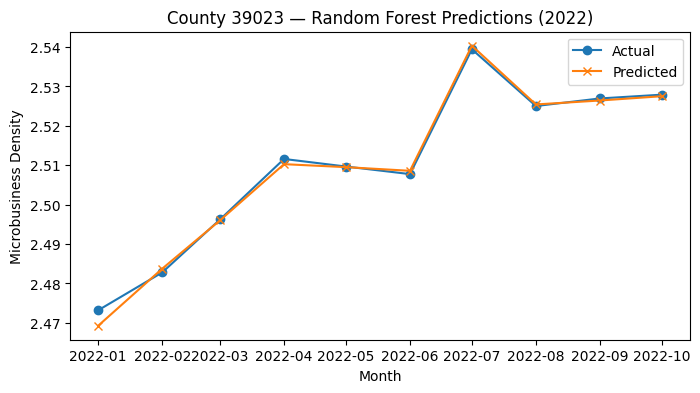

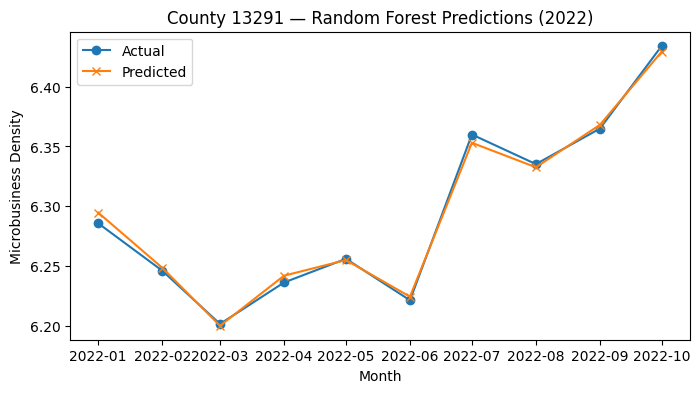

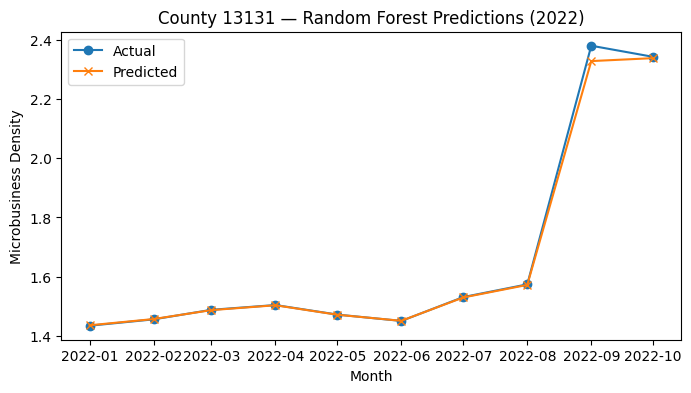

In [ ]:
val_set["pred_rf"] = models["RandomForest"].predict(X_val)

# pick a few random counties
sample_cfips = val_set["cfips"].drop_duplicates().sample(3, random_state=42)

for c in sample_cfips:
    subset = val_set[val_set["cfips"] == c].sort_values("first_day_of_month")
    plt.figure(figsize=(8,4))
    plt.plot(subset["first_day_of_month"], subset["microbusiness_density"], label="Actual", marker="o")
    plt.plot(subset["first_day_of_month"], subset["pred_rf"], label="Predicted", marker="x")
    plt.title(f"County {c} — Random Forest Predictions (2022)")
    plt.xlabel("Month")
    plt.ylabel("Microbusiness Density")
    plt.legend()
    plt.show()


R² score: 0.9207811543841447


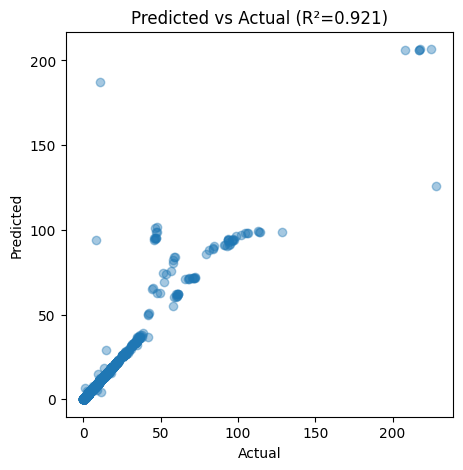

In [ ]:
from sklearn.metrics import r2_score

r2 = r2_score(y_val, val_set["pred_rf"])
print("R² score:", r2)

plt.figure(figsize=(5,5))
plt.scatter(y_val, val_set["pred_rf"], alpha=0.4)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title(f"Predicted vs Actual (R²={r2:.3f})")
plt.show()


In [41]:
same_month = df[df['year'] == 2022]
corrs = same_month.corr(numeric_only=True)['microbusiness_density'].sort_values(ascending=False)
print(corrs.head(10))

NameError: name 'df' is not defined